refer source: [Visualizing and Animating Optimization Algorithms with Matplotlib](http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/) 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

We shall restrict our attention to 3-dimensional problems for right now (i.e. optimizing over only 2 parameters), though what follows can be extended to higher dimensions by plotting all pairs of parameters against each other, effectively projecting the problem to 3-dimensions. 

The Wikipedia article on [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization) has a few functions that are useful for evaluating optimization algorithms. In particular, we shall look at **Beale's function**:

$$
f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2
$$

In [3]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [45]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

In [5]:
minima = np.array([3., .5])
f(*minima)

0.0

In [11]:
minima_ = minima.reshape(-1, 1)
minima_
f(*minima_)

array([0.])

In [8]:
func = value_and_grad(lambda args: f(*args))

In [9]:
def backtracking_line(f,x,grad_f,t=0.01,verbose=False):
    a=1/2
    b=1/2
    
    if verbose:
        print('g '+str(grad_f))
        print(f(x-t*grad_f)[0])
        print(a*t*np.dot(np.transpose(grad_f),grad_f))
    while f(x-t*grad_f)[0]>f(x)[0]-a*t*np.dot(np.transpose(grad_f),grad_f):
        t=b*t
    #x=x-t*grad_f
    if verbose:
        print('t '+str(t))
        print('x '+str(x))
    return t

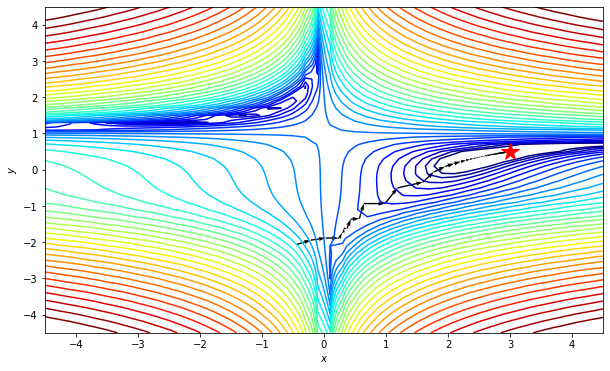

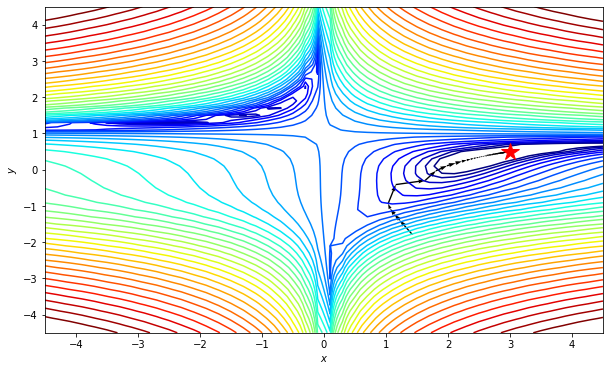

In [15]:
for i in range(2):
    step=0
    learning_rate=0.00001
    grad=np.ones([2,1])
    path_=[]
    init= 2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))#np.array([[3.],[4.]])#
    while(step<600 and (len(grad[abs(grad)>1e-6])>0)) :
        path_.append(init)

        zv,grad=func(init)
        learning_rate=backtracking_line(f=func,x=init,grad_f=grad,t=0.1,verbose=False)
        # if step%100==0:
        #     pass
        #     print(learning_rate)
        init=init-learning_rate*grad
        step+=1

    path=np.array(path_).T
    path=path[0]

    # plot
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
    ax.plot(*minima_, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    plt.plot()

[[0.07768413]
 [0.09541899]]
[[0.02189052]
 [0.01536897]]
[[-4.50400895e-06]
 [ 2.57877948e-06]]
[[-9.77991955e-05]
 [-5.18416462e-05]]
[[-0.6081329 ]
 [ 0.31154779]]
[[0.15228987]
 [0.10726913]]


[]

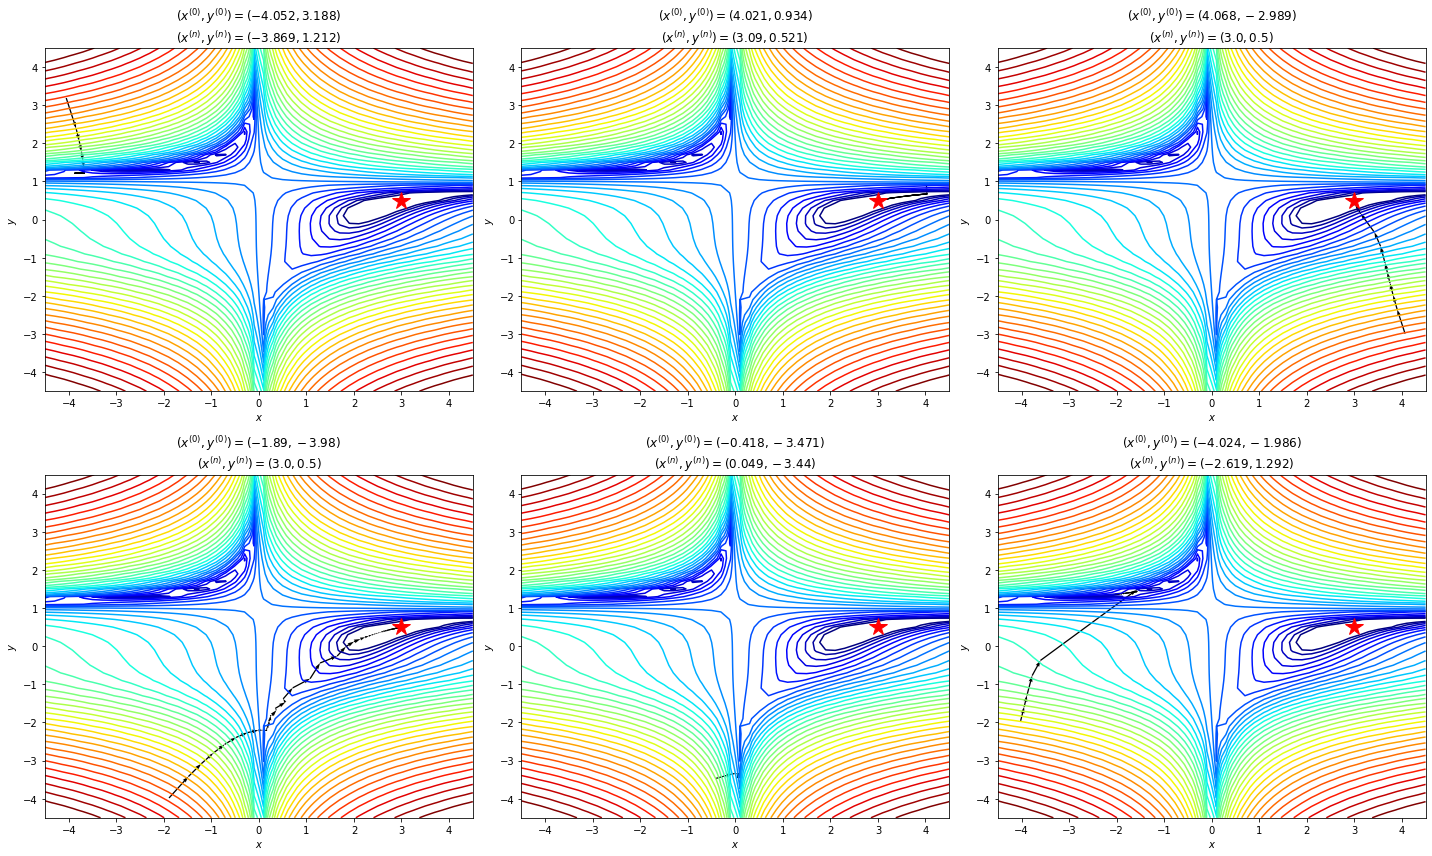

In [48]:
fig=plt.figure(figsize=(20,12))
for i in range(6):
    step=0
    # learning_rate=0.00001
    grad=np.ones([2,1])
    path_=[]
    init= 2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))#np.array([[3.],[4.]])#
    iterx=init
    while(step<400 and (len(grad[abs(grad)>1e-6])>0)) :
        path_.append(iterx)

        zv,grad=func(iterx)
        learning_rate=backtracking_line(f=func,x=iterx,grad_f=grad,t=0.1,verbose=False)
        # if step%100==0:
        #     pass
        #     print(learning_rate)
        iterx=iterx-learning_rate*grad
        step+=1
    print(grad)
    path=np.array(path_).T
    path=path[0]

    # plot
    ax = plt.subplot(2,3,i+1)#s(figsize=(10, 6))

    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
    ax.plot(*minima_, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.title('$(x^{(0)},y^{(0)})=('+str(np.round(init[0][0],3))+','+str(np.round(init[1][0],3))+')$\n$(x^{(n)},y^{(n)})=('+str(np.round(iterx[0][0],3))
+','+str(np.round(iterx[1][0],3))+')$')
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
plt.tight_layout()
plt.plot()

In [23]:
init[0][0]

2.9565202468115293

In [28]:
init[1][0]

0.489136840288977

In [29]:
np.round(init[0][0],3)
np.round(init[1][0],3)

0.489

[]

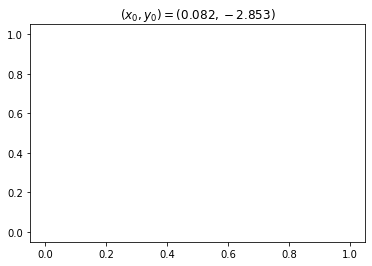

In [38]:
plt.title('$(x^{(0)},y^{(0)})=('+str(np.round(init[0][0],3))
+','+str(np.round(init[1][0],3))+')$')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()

In [80]:
    def backtrack(f,iterx,grad,maxstep=400,t=0.1,verbose=False):
        path_=[]
        step=0
        while(step<maxstep and (len(grad[abs(grad)>1e-6])>0)):
            path_.append(iterx)

            zv,grad=func(iterx)
            learning_rate=backtracking_line(f=func,x=iterx,grad_f=grad,t=t,verbose=verbose)
            # if step%100==0:
            #     pass
            #     print(learning_rate)
            iterx=iterx-learning_rate*grad
            step+=1
        print(grad)
        path=np.array(path_).T
        path=path[0]
        return path

[[0.12921535]
 [0.03898363]]


[]

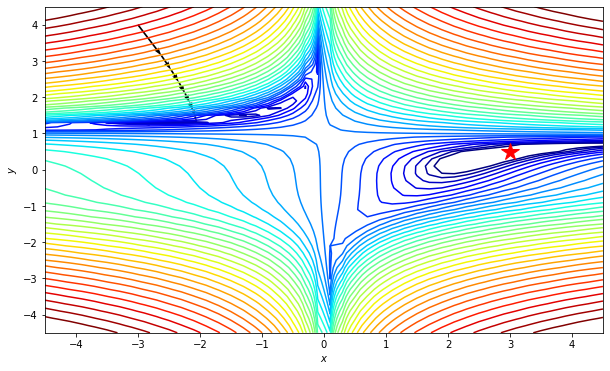

In [81]:
step=0
learning_rate=0.001
grad=np.ones([2,1])

init= np.array([[-3.],[4.]])#2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))#

path=backtrack(f=func,iterx=init,grad=grad,maxstep=400,t=1,verbose=False)

# plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()

In [ ]:
plt.plot(path[0])
plt.plot(path[1])

In [94]:
def skateStep(f,x,t=1,threshold=1e-2,maxStep=50):
    '''
    Args:
    @f_x, function return value and gradient
    @df_dx, first order derivative of f_x
    @x, initial x
    @t, initial learing rate
    @threshold, transform to skate mode limit
    @maxStep, max iteration times
    '''
    skateMode=False
    finalMode=False
    step=0
    fv,grad=f(x)

    path_=[]
        

    while(step<maxStep and len(grad[abs(grad)>1e-6])>0) :
        fv,grad=f(x)
        path_.append(x)
        if skateMode==False:
            t=backtracking_line(f=f,x=x,grad_f=grad,t=t)
            x=x-t*grad
        if finalMode==False and skateMode==False and len(grad[abs(grad)<threshold])>0:
            print(grad,x)
            skate=t*10
            skateMode=True
            minVal=fv
            minSite=x
            minVal2=fv
            minSite2=x
        if skateMode==True:
            # record min value and min site(and 2)
            x=x-skate*grad
            # print('skate')
            # print(step)
            if fv<minVal:
                minVal=fv
                minSite=x
            else:
                # print('here')
                # return to last step
                x=minSite
                y=fv
                #x=(y/(minVal+y))*(minSite-x)+x
                finalMode=True
                skateMode=False
        if finalMode==True:
            t=backtracking_line(f=f,x=x,grad_f=grad,t=t)
            x=x-t*grad
        step+=1
    print(grad)
    path=np.array(path_).T
    path=path[0]
    return path
    #return x,step

[[-1.77713973e-03]
 [ 5.69787343e+01]] [[2.05375229]
 [0.99906652]]
[[-2.91646864]
 [30.13202844]]


[]

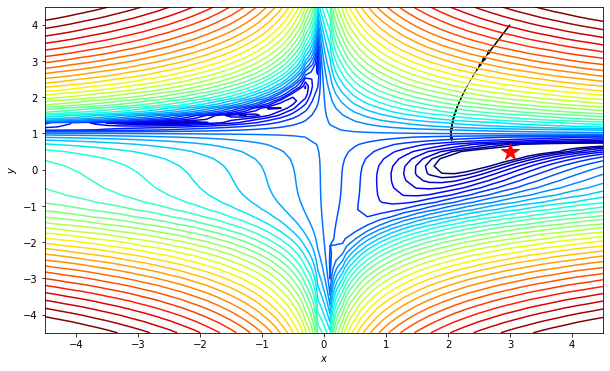

In [95]:
step=0
learning_rate=0.001
grad=np.ones([2,1])
path_=[]
init= np.array([[3.],[4.]])#2*xmax*(np.random.random(size=[2,1])-0.5*np.ones([2,1]))#

path=skateStep(f=func,x=init,t=1,threshold=1e-2,maxStep=500)#backtrack(f=func,iterx=init,grad=grad,maxstep=400,t=1,verbose=False)


# plot1
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()



# path2=backtrack(f=func,iterx=init,grad=grad,maxstep=400,t=1,verbose=False)
# path=path2
# # plot2
# fig, ax = plt.subplots(figsize=(10, 6))

# ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
# ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
# ax.plot(*minima_, 'r*', markersize=18)

# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))
# plt.plot()

In [87]:
path

array([[-3.        , -2.621418  , -2.54473612, -2.49455581, -2.45760924,
        -2.42864152, -2.40500342, -2.38516784, -2.36817416, -2.3533793 ,
        -2.34033219, -2.3287046 , -2.31825058, -2.3087813 , -2.30014877,
        -2.29223501, -2.28494453, -2.27819902, -2.27193353, -2.26609362,
        -2.26063327, -2.25551323, -2.25069977, -2.24616375, -2.2418798 ,
        -2.23782572, -2.23398199, -2.23033134, -2.22685846, -2.2235497 ,
        -2.22039283, -2.21737688, -2.21449197, -2.21172915, -2.20908033,
        -2.20653814, -2.20409586, -2.20174737, -2.19948705, -2.19730973,
        -2.19521067, -2.19318551, -2.1912302 , -2.18934101, -2.18751447,
        -2.18574738, -2.18403675, -2.18237978, -2.1807739 , -2.17921666],
       [ 4.        ,  3.14897156,  2.95568484,  2.82419662,  2.72441424,
         2.64416928,  2.57722096,  2.51991783,  2.46993204,  2.42568619,
         2.38606131,  2.35023467,  2.31758364,  2.28762575,  2.25997959,
         2.23433848,  2.21045221,  2.18811404,  2.

In [97]:
np.transpose(path)[-1]

array([2.0617403 , 0.82600714])

In [98]:
func(np.transpose(path)[-1])

(6.8227282280904635, array([-2.91646864, 30.13202844]))